In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

creditdata = pd.read_csv('./Data/creditcard.csv')

In [2]:
creditdata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
y = creditdata["Class"]
X = creditdata.loc[:, creditdata.columns != 'Class']
X = X.drop('Time', axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [7]:
print('사기 거래 갯수 : ', (y == 1).sum(), '\n', '정상 거래 갯수 : ', (y==0).sum(), '\n', '사기 비율 : ', (y == 1).sum() / len(y))

사기 거래 갯수 :  492 
 정상 거래 갯수 :  284315 
 사기 비율 :  0.001727485630620034


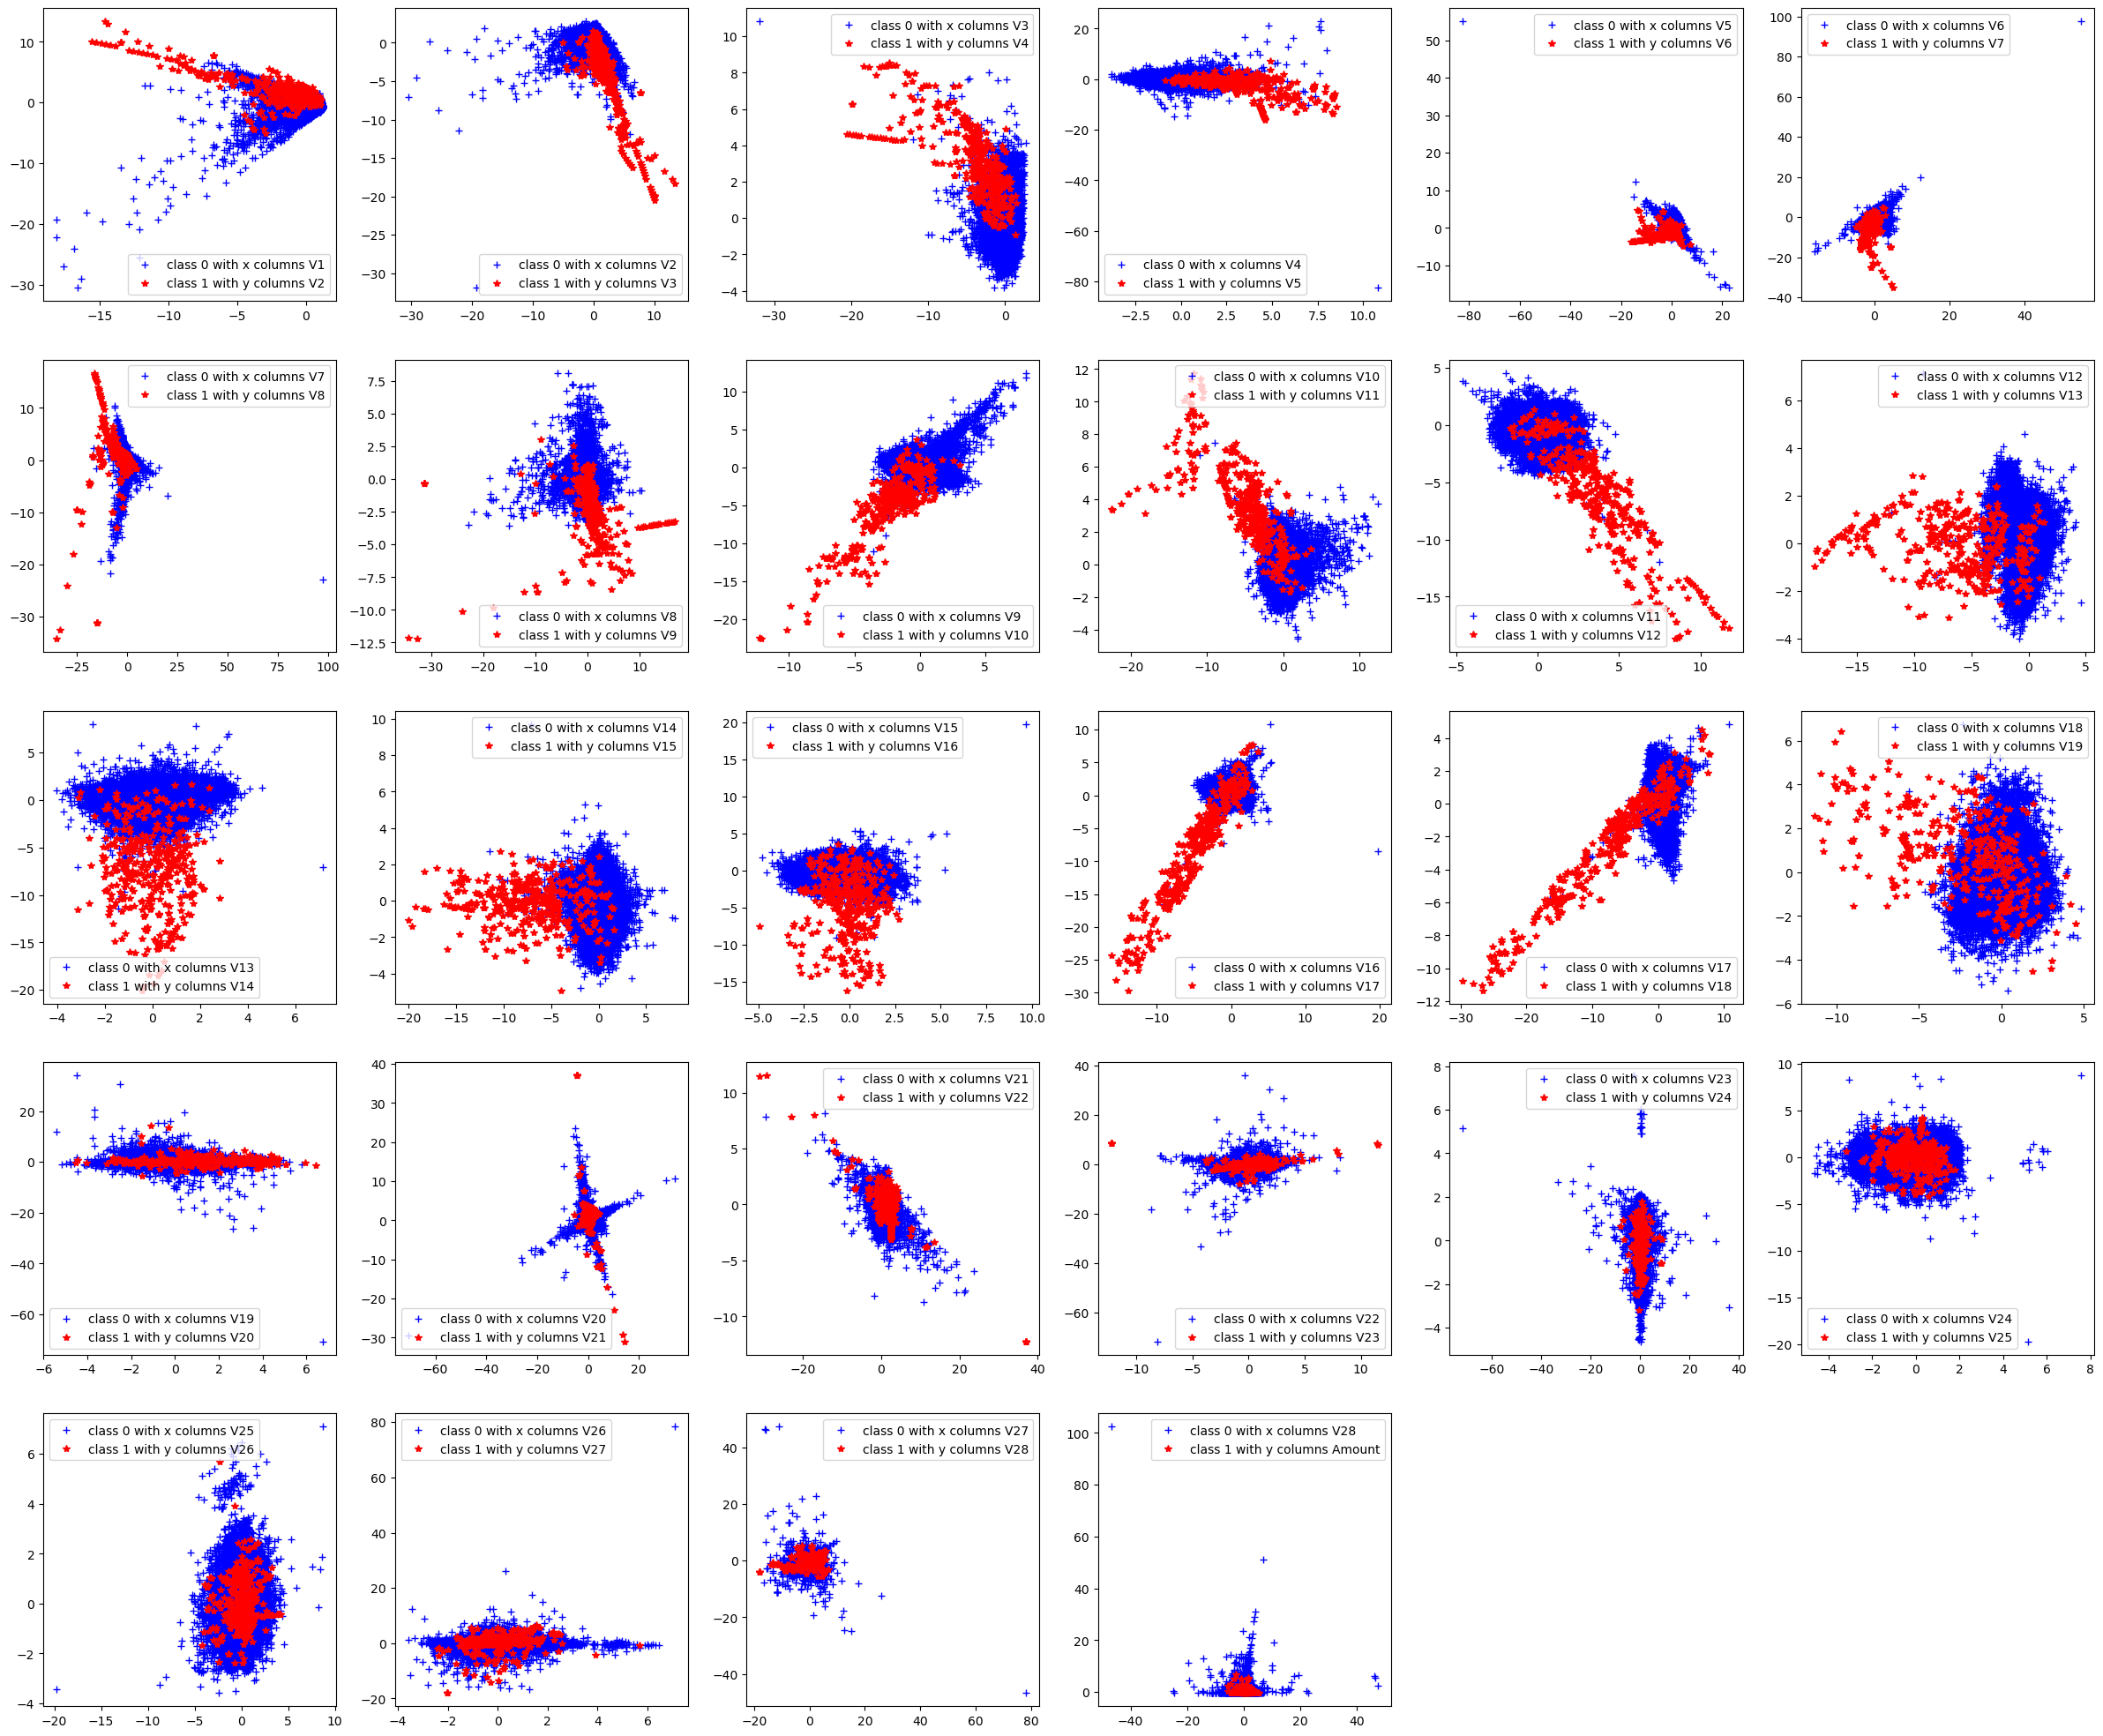

Index(['V1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V24', 'V26',
       'V27', 'V28', 'Amount'],
      dtype='object') 24
(39794, 24)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_estimators=300;, score=0.857 total time= 2.1min
[CV 2/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_estimators=300;, score=0.949 total time= 2.2min
[CV 3/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_estimators=300;, score=0.850 total time= 2.1min
[CV 4/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_estimators=300;, score=0.842 total time= 2.2min
[CV 5/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_estimators=300;, score=nan total time=   0.0s
[CV 6/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_estimators=300;, score=nan total time=   0.0s
[CV 7/10] END gb__learning_rate=0.03, gb__max_depth=6, gb__n_est

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/imblearn/pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python

KeyboardInterrupt: 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, f1_score

imbalance_y_ratio = 0.01

RUS = RandomUnderSampler(sampling_strategy=imbalance_y_ratio)

UX, Uy = RUS.fit_resample(X_train, y_train)

yplot_num = 5
xplot_num = int(np.round(len(X_train[0,:]), -1)/yplot_num)

plt.figure(figsize=(xplot_num * 5, yplot_num * 5))
for idx, x in enumerate(X.columns):
    if idx == len(X.columns)-1:
        break
    else:
        plt.subplot(yplot_num, xplot_num, idx+1)
        plt.plot(UX[Uy==0, idx], UX[Uy==0, idx+1], 'b+', label=f'class 0 with x columns {X.columns[idx]}')
        plt.plot(UX[Uy==1, idx], UX[Uy==1, idx+1], 'r*', label=f'class 1 with y columns {X.columns[idx+1]}')
        plt.legend()

plt.show()

UX.shape, Uy.shape, Uy.value_counts()

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model, cv=10)
rfecvfit = rfecv.fit(UX, Uy)

rfecvfit_selected_values = X.columns[rfecvfit.get_support()]
print(rfecvfit_selected_values, len(rfecvfit_selected_values), sep=' ')

X_train_rfecvfit = UX[:, rfecvfit.get_support()]
X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
y_train_rfecvfit = Uy
y_test_rfecvfit = y_test

print(X_train_rfecvfit.shape)

n_estimator = [50, 100, 150, 200, 250, 300]
learning_rate = [0.01, 0.02, 0.03]
max_depth = [2, 4, 6, 8, 10]

param_grid = dict(gb__n_estimators = n_estimator,
                  gb__max_depth = max_depth,
                  gb__learning_rate = learning_rate)

kf = StratifiedKFold(n_splits=5)

GBmodel = Pipeline(
    [('oss', RandomUnderSampler(sampling_strategy=imbalance_y_ratio)),
     ('gb', GradientBoostingClassifier())]
)

grid = RandomizedSearchCV(estimator=GBmodel, param_distributions=param_grid, verbose=3, scoring='f1', cv=kf)

grid_result = grid.fit(X_train_rfecvfit, y_train_rfecvfit)

scores_df = pd.DataFrame(grid_result.cv_results_)
scores_df.head()

a = grid_result.best_params_

gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'], learning_rate = a['gb__learning_rate'])
gb_final.fit(X_train_rfecvfit, y_train_rfecvfit)

gb_final.feature_importances_
gb_final.feature_importances_, X.columns[rfecvfit.get_support()]

fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit.get_support()]).sort_values(ascending=True)
plt.barh(fimp.index, fimp.values)

y_pred3 = gb_final.predict(X_test_rfecvfit)
confusion_matrix(y_test, y_pred3)

print(f'f1 score = {f1_score(y_test, y_pred3)}')

In [13]:
!pip install --upgrade imblearn

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, f1_score

# imbalance_y_ratio = 0.01

# RUS = RandomUnderSampler(sampling_strategy=imbalance_y_ratio)

# UX, Uy = RUS.fit_resample(X_train, y_train)

# yplot_num = 5
# xplot_num = int(np.round(len(X_train[0,:]), -1)/yplot_num)

# plt.figure(figsize=(xplot_num * 5, yplot_num * 5))
# for idx, x in enumerate(X.columns):
#     if idx == len(X.columns)-1:
#         break
#     else:
#         plt.subplot(yplot_num, xplot_num, idx+1)
#         plt.plot(UX[Uy==0, idx], UX[Uy==0, idx+1], 'b+', label=f'class 0 with x columns {X.columns[idx]}')
#         plt.plot(UX[Uy==1, idx], UX[Uy==1, idx+1], 'r*', label=f'class 1 with y columns {X.columns[idx+1]}')
#         plt.legend()

# plt.show()

# UX.shape, Uy.shape, Uy.value_counts()

# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFECV

# model = LogisticRegression()
# rfecv = RFECV(model, cv=10)
# rfecvfit = rfecv.fit(UX, Uy)

# rfecvfit_selected_values = X.columns[rfecvfit.get_support()]
# print(rfecvfit_selected_values, len(rfecvfit_selected_values), sep=' ')

# X_train_rfecvfit = UX[:, rfecvfit.get_support()]
# X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
# y_train_rfecvfit = Uy
# y_test_rfecvfit = y_test

# print(X_train_rfecvfit.shape)

n_estimator = [200, 300, 400, 500]
learning_rate = [0.01, 0.02]
max_depth = [2, 4]
imbalance_y_ratio = [0.005, 0.01]

param_grid = dict(oss__sampling_strategy = imbalance_y_ratio,
                  gb__n_estimators = n_estimator,
                  gb__max_depth = max_depth,
                  gb__learning_rate = learning_rate)

kf = StratifiedKFold(n_splits=3)

GBmodel = Pipeline(
    [('oss', RandomUnderSampler()),
     ('fs', RFECV(LogisticRegression(), cv=5)),
     ('gb', GradientBoostingClassifier())]
)

grid = RandomizedSearchCV(estimator=GBmodel, param_distributions=param_grid, verbose=3, scoring='f1', cv=kf)

grid_result = grid.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_result.cv_results_)
scores_df.head()

a = grid_result.best_params_
a

# gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'], learning_rate = a['gb__learning_rate'])
# gb_final.fit(X_train_rfecvfit, y_train_rfecvfit)

# gb_final.feature_importances_
# gb_final.feature_importances_, X.columns[rfecvfit.get_support()]

# fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit.get_support()]).sort_values(ascending=True)
# plt.barh(fimp.index, fimp.values)

# y_pred3 = gb_final.predict(X_test_rfecvfit)
# confusion_matrix(y_test, y_pred3)

# print(f'f1 score = {f1_score(y_test, y_pred3)}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END gb__learning_rate=0.02, gb__max_depth=4, gb__n_estimators=300, oss__sampling_strategy=0.005;, score=0.767 total time= 2.2min
[CV 2/3] END gb__learning_rate=0.02, gb__max_depth=4, gb__n_estimators=300, oss__sampling_strategy=0.005;, score=0.762 total time= 2.0min
[CV 3/3] END gb__learning_rate=0.02, gb__max_depth=4, gb__n_estimators=300, oss__sampling_strategy=0.005;, score=0.756 total time=  46.6s
[CV 1/3] END gb__learning_rate=0.01, gb__max_depth=2, gb__n_estimators=500, oss__sampling_strategy=0.005;, score=0.848 total time= 1.8min
[CV 2/3] END gb__learning_rate=0.01, gb__max_depth=2, gb__n_estimators=500, oss__sampling_strategy=0.005;, score=0.789 total time= 1.3min
[CV 3/3] END gb__learning_rate=0.01, gb__max_depth=2, gb__n_estimators=500, oss__sampling_strategy=0.005;, score=0.787 total time= 1.3min
[CV 1/3] END gb__learning_rate=0.01, gb__max_depth=4, gb__n_estimators=300, oss__sampling_strategy=0.01;, score

{'oss__sampling_strategy': 0.005,
 'gb__n_estimators': 500,
 'gb__max_depth': 2,
 'gb__learning_rate': 0.01}

f1 score = 0.7526881720430106


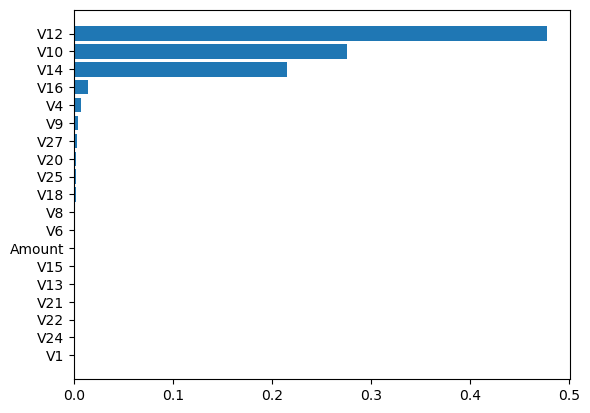

In [20]:
RUS = RandomUnderSampler(sampling_strategy=a['oss__sampling_strategy'])

UX, Uy = RUS.fit_resample(X_train, y_train)

model = LogisticRegression()
rfecv = RFECV(model, cv=5)
rfecvfit = rfecv.fit(UX, Uy)

X_train_rfecvfit = UX[:, rfecvfit.get_support()]
X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
y_train_rfecvfit = Uy
y_test_rfecvfit = y_test

gb_final = GradientBoostingClassifier(n_estimators = a['gb__n_estimators'], max_depth = a['gb__max_depth'], learning_rate = a['gb__learning_rate'])
gb_final.fit(X_train_rfecvfit, y_train_rfecvfit)

fimp = pd.Series(gb_final.feature_importances_, index=X.columns[rfecvfit.get_support()]).sort_values(ascending=True)
plt.barh(fimp.index, fimp.values)

y_pred3 = gb_final.predict(X_test_rfecvfit)
confusion_matrix(y_test, y_pred3)

print(f'f1 score = {f1_score(y_test, y_pred3)}')

In [21]:
RUS = RandomUnderSampler(sampling_strategy=a['oss__sampling_strategy'])

UX, Uy = RUS.fit_resample(X_train, y_train)

Uy.value_counts()
# model = LogisticRegression()
# rfecv = RFECV(model, cv=5)
# rfecvfit = rfecv.fit(UX, Uy)

# X_train_rfecvfit = UX[:, rfecvfit.get_support()]
# #X_test_rfecvfit = X_test[:, rfecvfit.get_support()]
# y_train_rfecvfit = Uy
#y_test_rfecvfit = y_test

0    78800
1      394
Name: Class, dtype: int64

True

In [33]:
Uy[Uy==1].count() / Uy[Uy==0].count()

0.005